### PROJECT ON CUSTOMER SEGMENTATION FOR MARKETING STRATEGIES

### OBJECTIVES
   Use clustering to segment customers based on purchasing behavior, demographics or engagement with services

In [1]:
#Installing necessary libraries
!pip install numpy scipy matplotlib statsmodels scikit-learn pandas


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\Asus\AppData\Local\Temp\ipykernel_5456\800521007.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The datset is downloaded from Kaggle. The dataset is called "Consumer Behavior and Shopping Habits". The dataset consists of age, Id, Gender, Item Purchased, Category, Purchase Amount, size, Location, Color, Season etc

In [3]:
# reading file in the dataset using pandas
# the first ten rows of the dataset
df=pd.read_csv("shopping_behavior_updated.csv")
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [4]:
# columns available in the dataset
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
# count (numbers of rows or data) present in the dataset
df.count()

Customer ID               3900
Age                       3900
Gender                    3900
Item Purchased            3900
Category                  3900
Purchase Amount (USD)     3900
Location                  3900
Size                      3900
Color                     3900
Season                    3900
Review Rating             3900
Subscription Status       3900
Shipping Type             3900
Discount Applied          3900
Promo Code Used           3900
Previous Purchases        3900
Payment Method            3900
Frequency of Purchases    3900
dtype: int64

In [6]:
# data types of each column
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
# total count
df.shape

(3900, 18)

In [9]:
#generating statistics for numerical values in the dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
#generating statistics for data type object in the dataset
df.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [11]:
# checking for duplicates 
duplicate_counts = df.duplicated().sum()
print(duplicate_counts)

0


In [12]:
#Converting the data in the column Frequency of purchases from object to int 
mapping = {'Fortnightly': 26, 'Weekly': 52, 'Quarterly': 4, 'Annually': 1, 'Bi-Weekly': 26, 'Every 3 Months': 4, 'Monthly': 12 }

# Replace categorical values with integer values
df['Frequency_of_Purchases_int'] = df['Frequency of Purchases'].map(mapping)

# Display the converted DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [13]:
#Converting the data in the column Season from object to int 
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}

# Replace categorical values with integer values
df['Season_int'] = df['Season'].map(season_mapping)

# Display the converted DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [14]:
#Converting the data in the column Category from object to int 
category_mapping = {'Clothing': 1, 'Footwear': 2, 'Outerwear': 3, 'Accessories': 4}

# Replace categorical values with integer values
df['Category_int'] = df['Category'].map(category_mapping)

# Display the converted DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

In [15]:
#Converting the data in the column Size from object to int 
size_mapping = {'XL': 1, 'L': 2, 'M': 3, 'S':4}

# Replace categorical values with integer values
df['Size_int'] = df['Size'].map(size_mapping)

# Display the converted DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

In [16]:
#Converting the data in the column Gender from object to int 
gender_mapping = {'Male': 0, 'Female' : 1}

# Replace categorical values with integer values
df['Gender_int'] = df['Gender'].map(gender_mapping)

# Display the converted DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

In [38]:
#Converting the data in the column Payment Method object to int 
payment_mapping = {'PayPal': 0, 'Credit Card' : 1, 'Cash' : 2, 'Debit Card': 3, 'Venmo' : 4, 'Bank Transfer': 5}

# Replace categorical values with integer values
df['Payment_Method_int'] = df['Payment Method'].map(payment_mapping)

# Display the converted DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

In [39]:
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,Frequency_of_Purchases_int,Season_int,Category_int,Size_int,Gender_int,cluster,Payment_Method_int
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,26,4,1,2,0,2,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,26,4,1,2,0,1,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,52,1,1,4,0,0,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,52,1,2,3,0,1,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,1,1,1,3,0,2,0
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,...,14,Venmo,Weekly,52,2,2,3,0,2,4
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,...,49,Cash,Quarterly,4,3,1,3,0,0,2
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,...,19,Credit Card,Weekly,52,4,1,2,0,2,1
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,...,8,Venmo,Annually,1,2,3,2,0,1,4
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,...,4,Cash,Quarterly,4,1,4,3,0,2,2


In [18]:
df.dtypes

Customer ID                     int64
Age                             int64
Gender                         object
Item Purchased                 object
Category                       object
Purchase Amount (USD)           int64
Location                       object
Size                           object
Color                          object
Season                         object
Review Rating                 float64
Subscription Status            object
Shipping Type                  object
Discount Applied               object
Promo Code Used                object
Previous Purchases              int64
Payment Method                 object
Frequency of Purchases         object
Frequency_of_Purchases_int      int64
Season_int                      int64
Category_int                    int64
Size_int                        int64
Gender_int                      int64
dtype: object

In [19]:
#after converting checking the statistics for numerical values again
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Frequency_of_Purchases_int,Season_int,Category_int,Size_int,Gender_int
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,17.471282,2.491795,2.273590,2.680000,0.320000
std,1125.977353,15.207589,23.685392,0.716223,14.447125,16.809646,1.122725,1.313715,0.881929,0.466536
min,1.000000,18.000000,20.000000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000,4.000000,1.000000,1.000000,2.000000,0.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,12.000000,2.000000,2.000000,3.000000,0.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,26.000000,3.000000,4.000000,3.000000,1.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000,52.000000,4.000000,4.000000,4.000000,1.000000


### Visualization

Bar Plot for distribution of color purchased

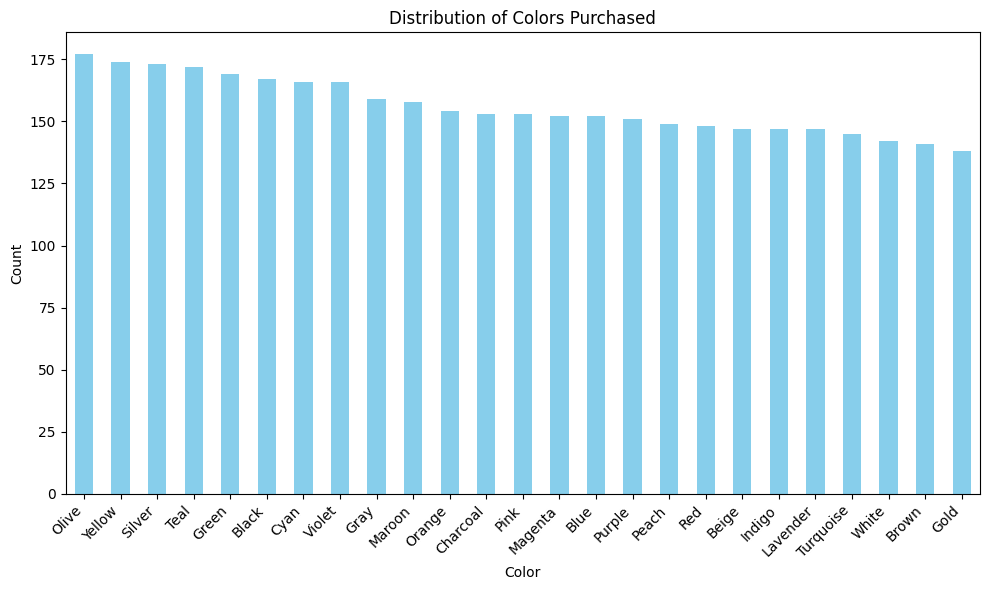

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# Extract the 'color' column from the DataFrame
colors = df['Color']

# Count occurrences of each color
color_counts = colors.value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Colors Purchased')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Histogram for the diatribution of Age

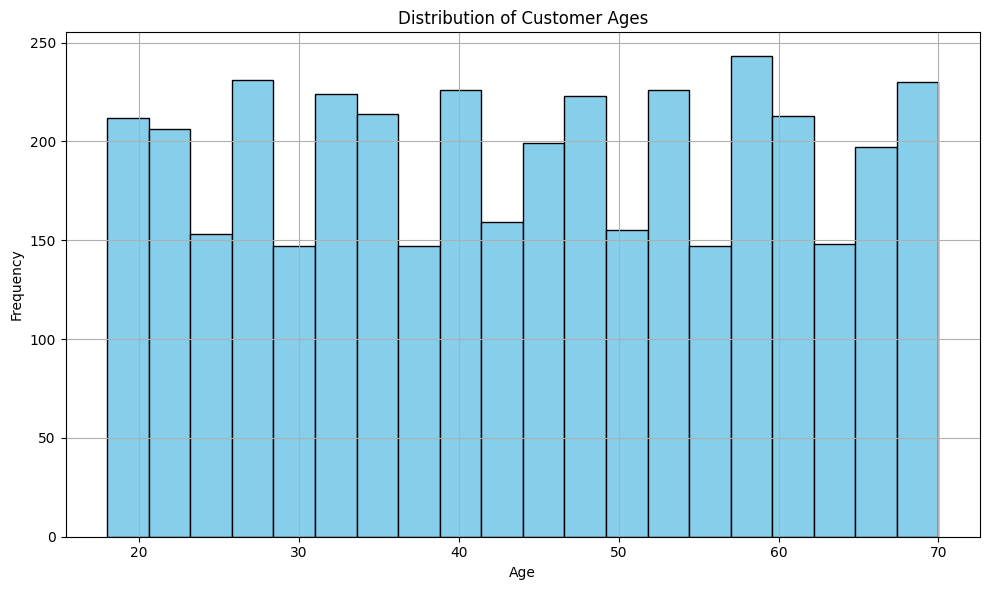

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
ages = df['Age']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

Heat Map for Age Vs Category

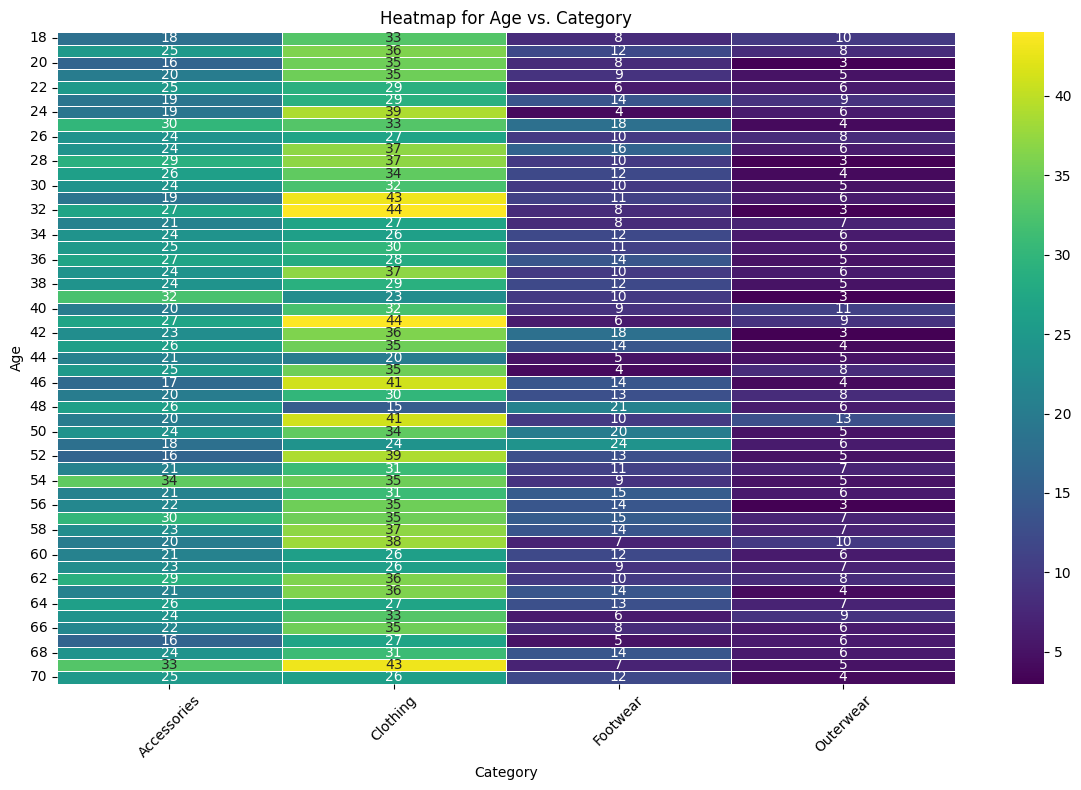

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Select the relevant columns for the heatmap
heatmap_data = df[['Age', 'Category']]

# Create a pivot table to aggregate data for the heatmap
heatmap_table = heatmap_data.pivot_table(index='Age', columns='Category', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_table, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Heatmap for Age vs. Category')
plt.xlabel('Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Bar plot for Payment Method

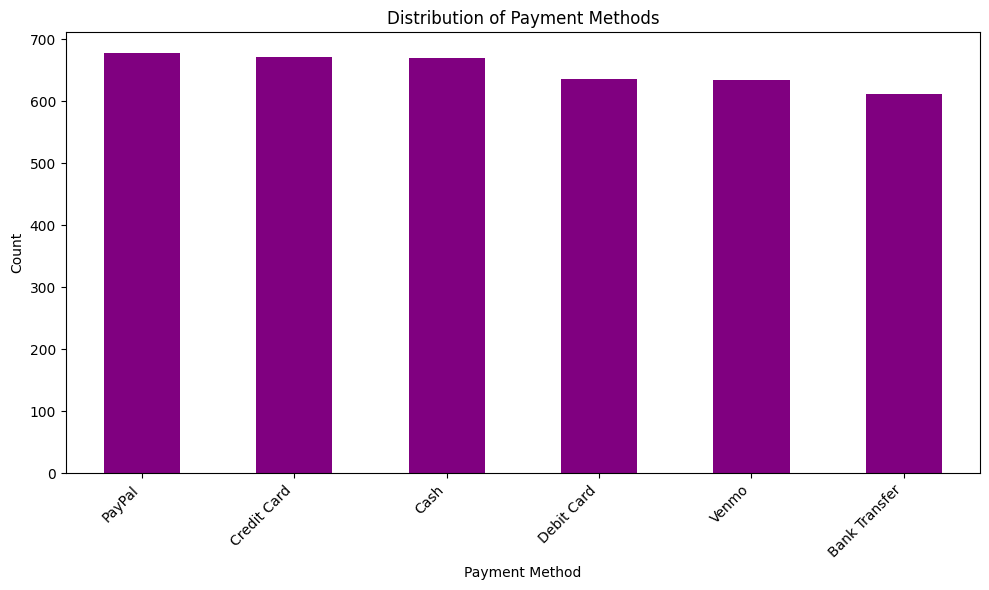

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Extract the 'payment_method' column from the DataFrame
payment_method_counts = df['Payment Method'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Age and Gender Distribution

Gender  Female  Male
Age                 
18          20    49
19          27    54
20          12    50
21          19    50
22          28    38
23          25    46
24          21    47
25          21    64
26          25    44
27          28    55
28          26    53
29          23    53
30          20    51
31          30    49
32          23    59
33          23    40
34          22    46
35          22    50
36          24    50
37          19    58
38          25    45
39          26    42
40          23    49
41          19    67
42          25    55
43          26    53
44          23    28
45          33    39
46          30    46
47          27    44
48          25    43
49          20    64
50          30    53
51          21    51
52          32    41
53          20    50
54          16    67
55          25    48
56          22    52
57          32    55
58          27    54
59          17    58
60          18    47
61          23    42
62          32    51
63          2

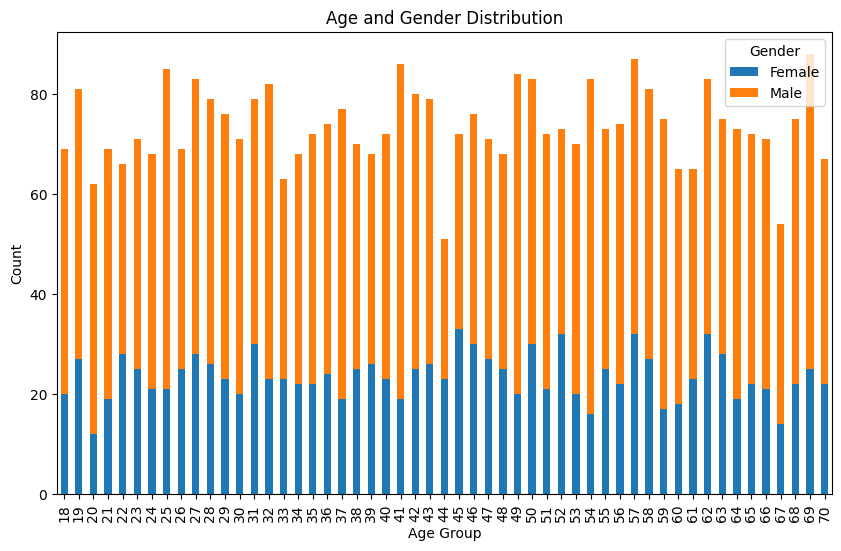

In [63]:
age_gender_distribution = df.groupby(['Age', 'Gender']).size().unstack(fill_value=0)
print(age_gender_distribution)
age_gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age and Gender Distribution')
plt.legend(title='Gender')
plt.show()

Age and Item Purchased Distribution

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Age                                                                           
18                     1     2       2      3     5      5       4        2   
19                     4     4       4      1     6      5       3        2   
20                     1     6       4      4     2      2       2        4   
21                     2     4       5      2     4      4       1        2   
22                     1     3       1      0     2      3       2        5   
23                     1     0       0      2     5      3       6        2   
24                     2     5       4      0     3      3       3        3   
25                     4     2       3      6     2      4       3        1   
26                     5     3       2      1     5      3       2        0   
27                     2     4       6      4     4      3       3        3   
28                     3     3       2      2     3 

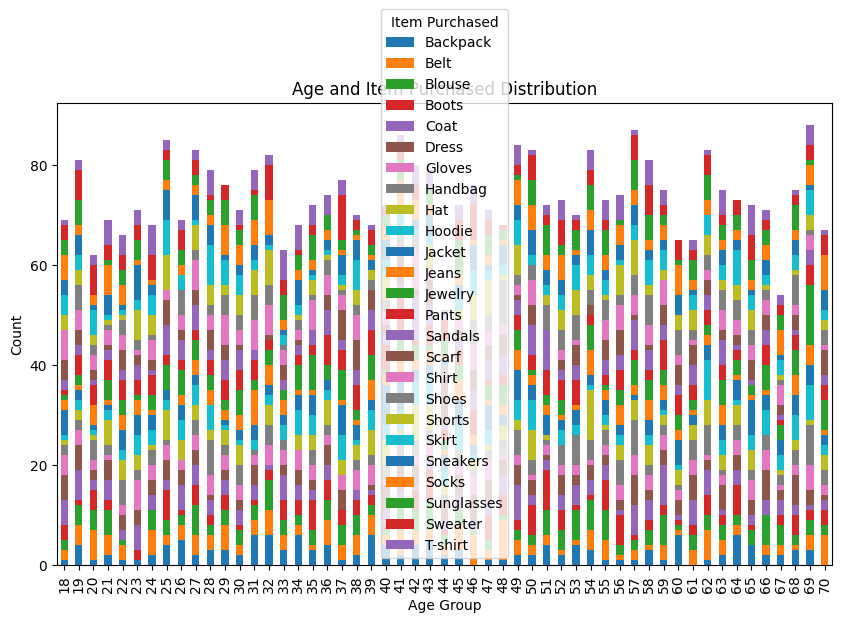

In [68]:
age_item_purchased = df.groupby(['Age', 'Item Purchased']).size().unstack(fill_value=0)
print(age_item_purchased)
age_item_purchased.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age and Item Purchased Distribution')
plt.legend(title='Item Purchased')
plt.show()

Correlation of features

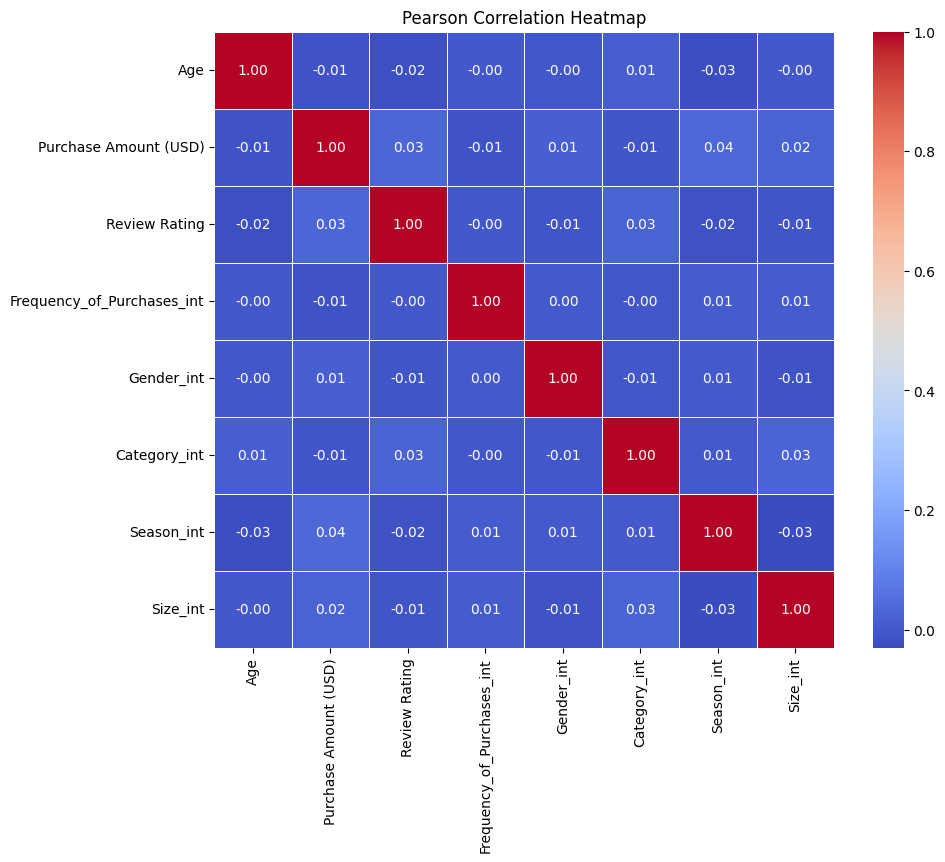

Pairs of features with high correlation (> 0.7):
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation analysis
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Frequency_of_Purchases_int', 'Gender_int', 'Category_int', 'Season_int', 'Size_int']

# Compute pairwise correlations using Pearson correlation coefficient
correlation_matrix = df[numerical_features].corr(method='pearson')

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Alternatively, you can compute Spearman correlation coefficient
# correlation_matrix = data[numerical_features].corr(method='spearman')

# Identify pairs of features that are highly correlated
highly_correlated_pairs = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)].stack().reset_index()
highly_correlated_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
highly_correlated_pairs = highly_correlated_pairs.drop_duplicates(subset='Correlation')

print("Pairs of features with high correlation (> 0.7):")
print(highly_correlated_pairs)

Since the dataframe is empty, it means none of the features are correlated to each other.

### Clustering


Clustering by selecting features purchase amount, previous purchases, frequency of purchases

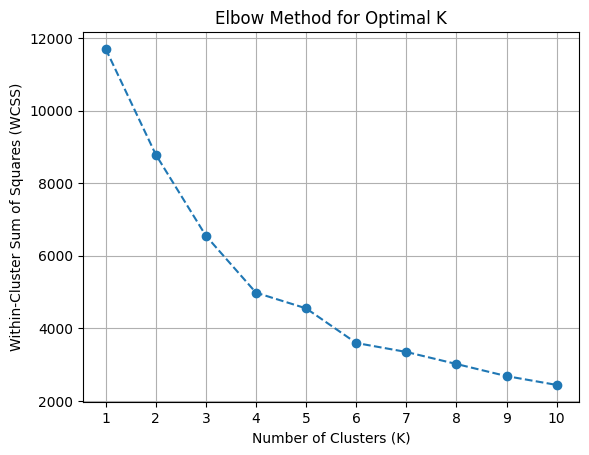

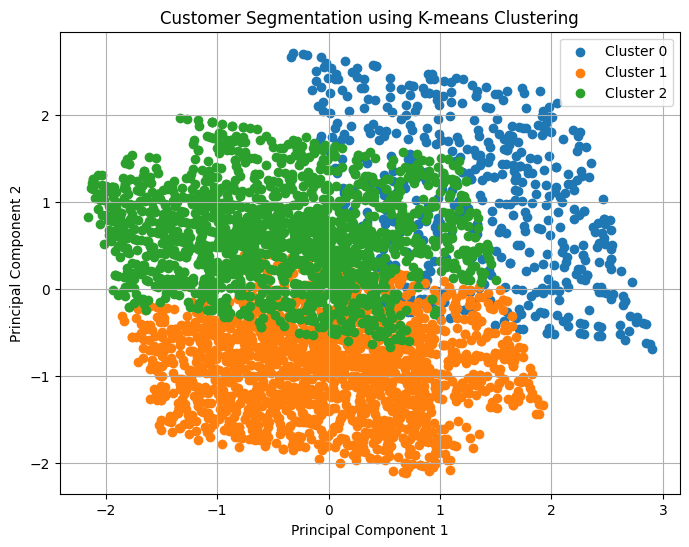

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features for segmentation
X = df[['Previous Purchases', 'Purchase Amount (USD)', 'Frequency_of_Purchases_int']]

# Preprocess features
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(Y_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal K
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (K)
optimal_k = 3 # Example: choose the point where the curve starts to bend (elbow point)

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(Y_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(Y_pca[df['cluster'] == i, 0], Y_pca[df['cluster'] == i, 1], label=f'Cluster {i}')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

# X: Feature matrix
# labels: Cluster labels assigned by K-means
# Calculate silhouette score
silhouette_avg = silhouette_score(Y_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.294976545449279



Clustering by selecting features age, purchase amount, previous purchases, frequency of purchases and payment methods

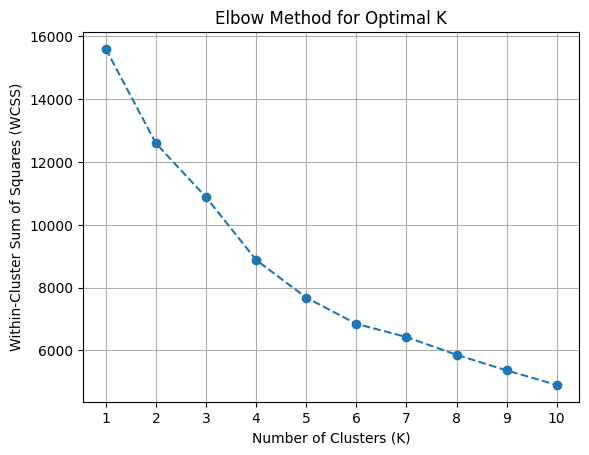

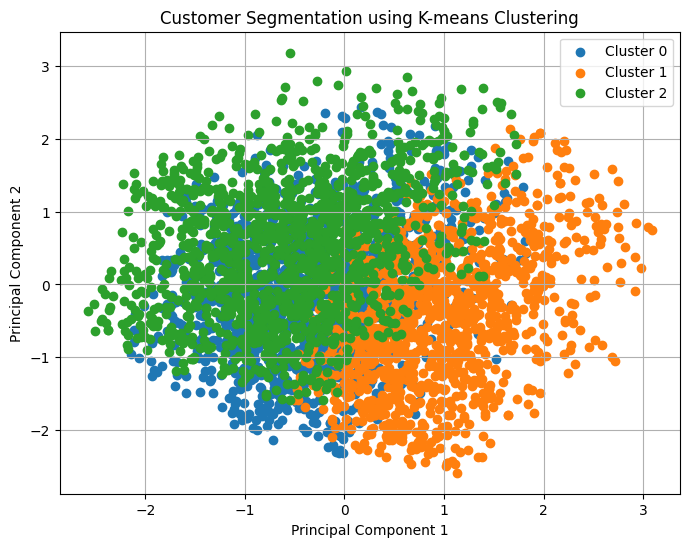

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features for segmentation
X = df[['Payment_Method_int', 'Previous Purchases', 'Purchase Amount (USD)', 'Frequency_of_Purchases_int']]

# Preprocess features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal K
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (K)
optimal_k = 3 # Example: choose the point where the curve starts to bend (elbow point)

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_pca[df['cluster'] == i, 0], X_pca[df['cluster'] == i, 1], label=f'Cluster {i}')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()    

In [45]:
from sklearn.metrics import silhouette_score

# X: Feature matrix
# labels: Cluster labels assigned by K-means
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.17672651927190933



Clustering by selecting features age, gender

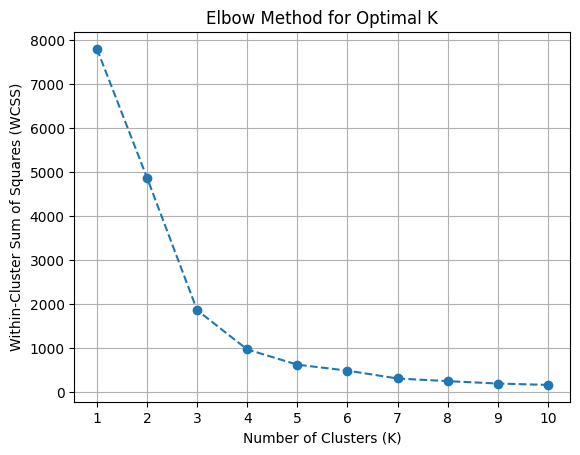

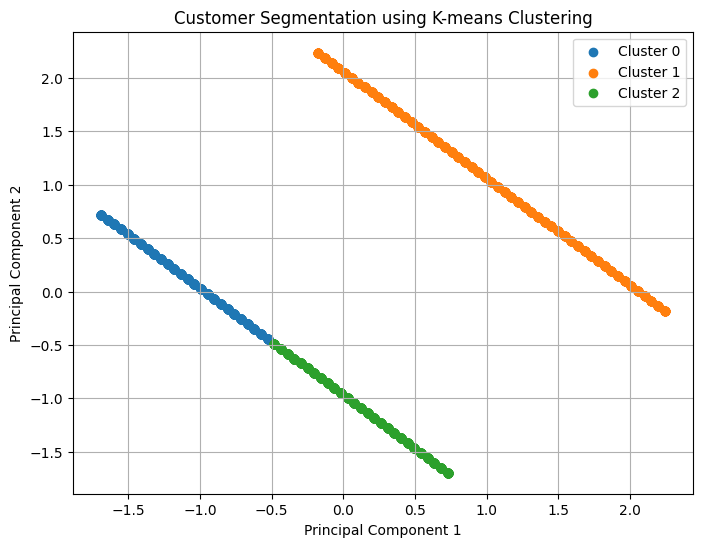

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features for segmentation
X = df[['Age', 'Gender_int']]

# Preprocess features
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(Z_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal K
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (K)
optimal_k = 3 # Example: choose the point where the curve starts to bend (elbow point)

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(Z_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(Z_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(Z_pca[df['cluster'] == i, 0], Z_pca[df['cluster'] == i, 1], label=f'Cluster {i}')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()    

In [52]:
from sklearn.metrics import silhouette_score

# X: Feature matrix
# labels: Cluster labels assigned by K-means
# Calculate silhouette score
silhouette_avg = silhouette_score(Z_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.34772412499666816



Clustering by selecting features size, season, category, payment method

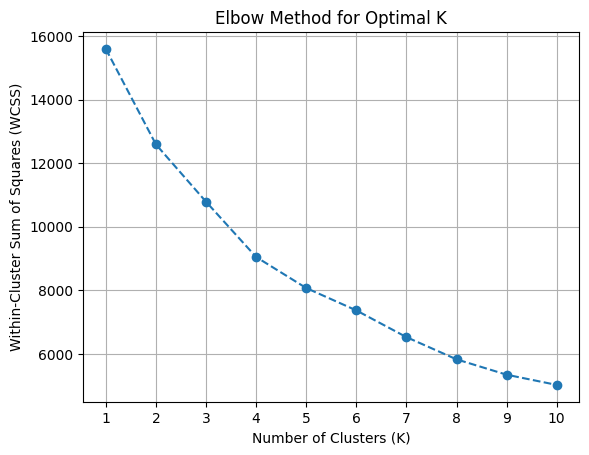

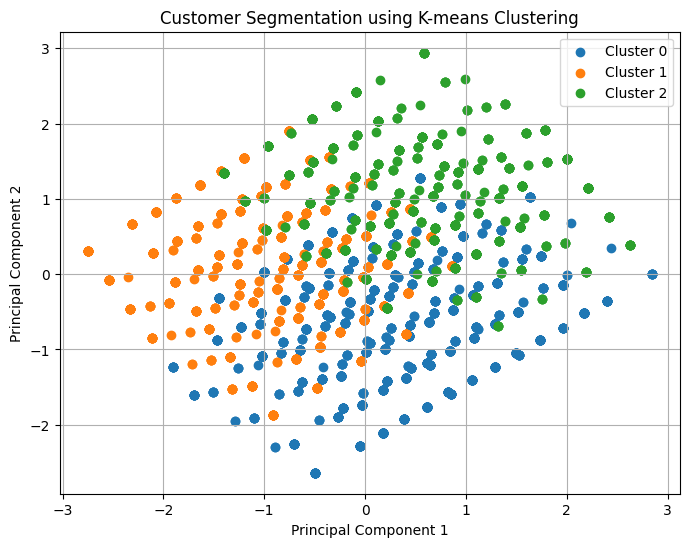

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features for segmentation
X = df[['Payment_Method_int', 'Size_int', 'Season_int', 'Category_int']]

# Preprocess features
scaler = StandardScaler()
S_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(S_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal K
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (K)
optimal_k = 3 # Example: choose the point where the curve starts to bend (elbow point)

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(S_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
S_pca = pca.fit_transform(S_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(S_pca[df['cluster'] == i, 0], S_pca[df['cluster'] == i, 1], label=f'Cluster {i}')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()        

In [56]:
from sklearn.metrics import silhouette_score

# X: Feature matrix
# labels: Cluster labels assigned by K-means
# Calculate silhouette score
silhouette_avg = silhouette_score(S_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18727570405841515


In [40]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,Frequency_of_Purchases_int,Season_int,Category_int,Size_int,Gender_int,cluster,Payment_Method_int
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,26,4,1,2,0,2,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,26,4,1,2,0,1,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,52,1,1,4,0,0,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,52,1,2,3,0,1,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,1,1,1,3,0,2,0
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,...,14,Venmo,Weekly,52,2,2,3,0,2,4
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,...,49,Cash,Quarterly,4,3,1,3,0,0,2
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,...,19,Credit Card,Weekly,52,4,1,2,0,2,1
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,...,8,Venmo,Annually,1,2,3,2,0,1,4
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,...,4,Cash,Quarterly,4,1,4,3,0,2,2


In [86]:
# finding the types of clothing in the column item purchsed

category_to_analyze = 'Category'  
filtered_data = df[df[category_to_analyze] == 'Clothing']  

# Identify unique types within the category
unique_types = filtered_data['Item Purchased'].unique()  

# Print the unique types within the category
print("Unique types within the category '{}':".format(category_to_analyze))
print(unique_types)

Unique types within the category 'Category':
['Blouse' 'Sweater' 'Jeans' 'Shirt' 'Shorts' 'Dress' 'Skirt' 'Pants'
 'Hoodie' 'T-shirt' 'Socks']


In [87]:
# finding the types of accessories in the column item purchased

category_to_analyze = 'Category'  
filtered_data = df[df[category_to_analyze] == 'Accessories'] 

# Identify unique types within the category
unique_types = filtered_data['Item Purchased'].unique() 

# Print the unique types within the category
print("Unique types within the category '{}':".format(category_to_analyze))
print(unique_types)

Unique types within the category 'Category':
['Handbag' 'Sunglasses' 'Jewelry' 'Scarf' 'Hat' 'Backpack' 'Belt' 'Gloves']


In [88]:
# finding the types of footwear in the column item purchased

category_to_analyze = 'Category'  
filtered_data = df[df[category_to_analyze] == 'Footwear'] 

# Identify unique types within the category
unique_types = filtered_data['Item Purchased'].unique() 

# Print the unique types within the category
print("Unique types within the category '{}':".format(category_to_analyze))
print(unique_types)

Unique types within the category 'Category':
['Sandals' 'Sneakers' 'Shoes' 'Boots']


In [89]:
# finding the types of outerwear in the column item purchased

category_to_analyze = 'Category'  
filtered_data = df[df[category_to_analyze] == 'Outerwear'] 

# Identify unique types within the category
unique_types = filtered_data['Item Purchased'].unique()  

# Print the unique types within the category
print("Unique types within the category '{}':".format(category_to_analyze))
print(unique_types)

Unique types within the category 'Category':
['Coat' 'Jacket']


In [41]:
city_count = df['Location'].nunique()

print("Number of unique cities:", city_count)

Number of unique cities: 50
